# pH regression & classification with SVM

In [2]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle
df = LoadData(44).load_data()
df = shuffle(df)
df.head()

no image
no image
no image
no image
no image
no image
no image


,blue,green,red,label
41,166,82,56,11
369,210,63,43,12
583,48,219,203,5
353,168,81,55,11
265,166,82,54,11


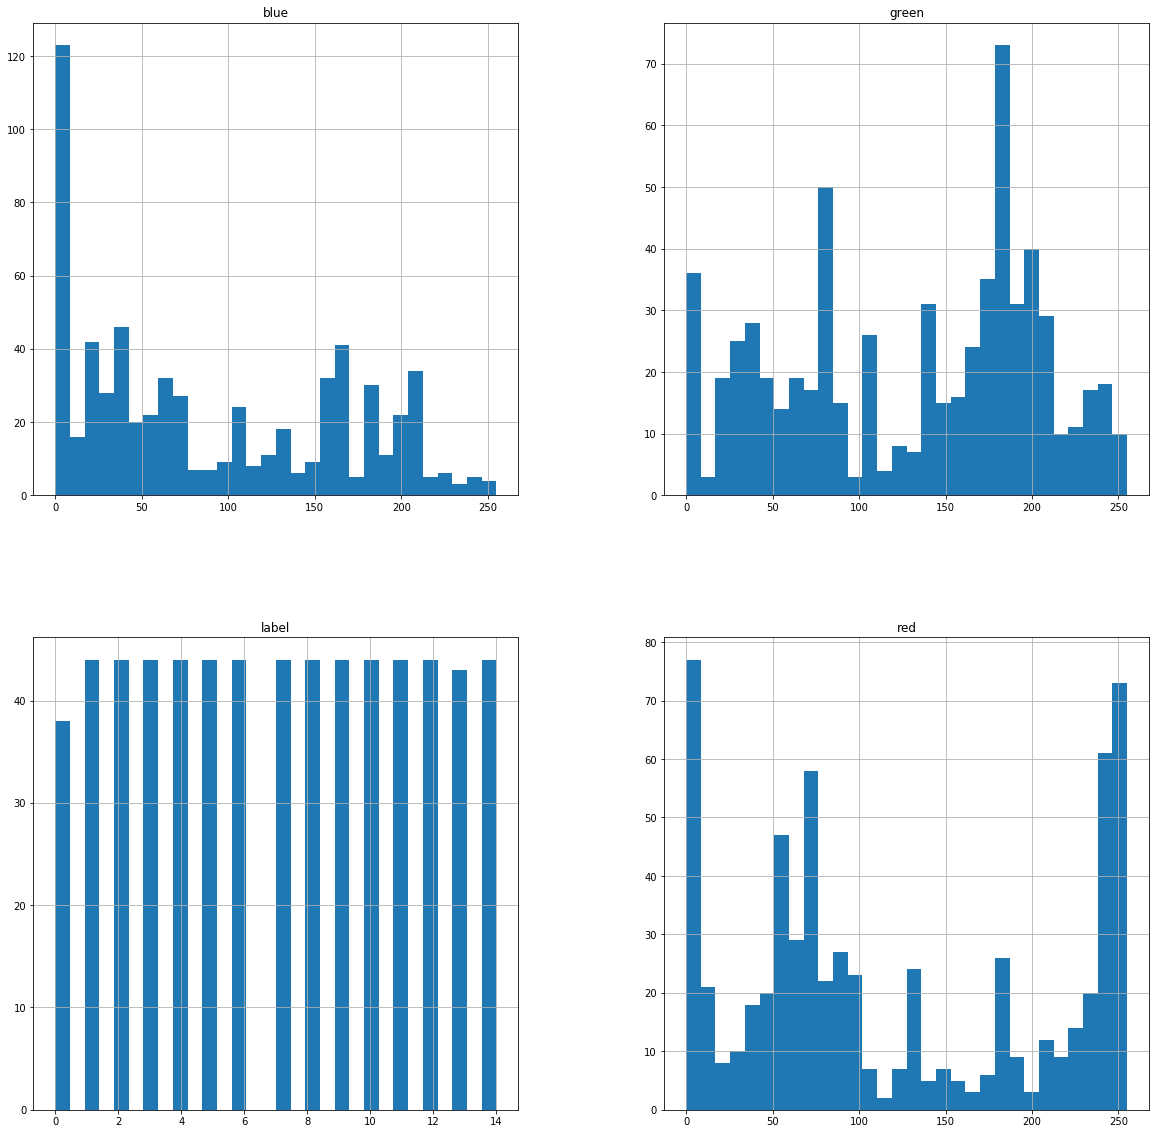

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=30,figsize=(20,20))
plt.show()

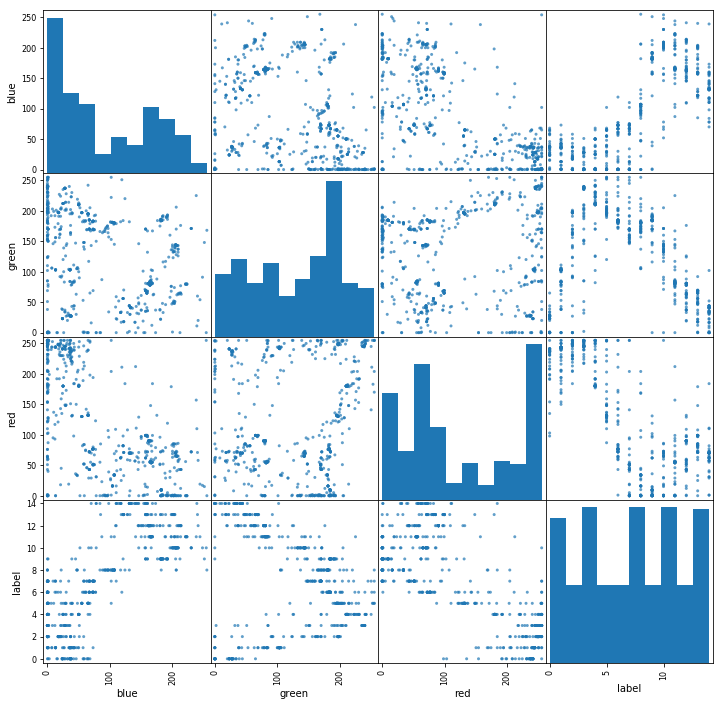

In [4]:
from pandas.plotting import scatter_matrix 
attributes = ['blue', 'green', 'red', 'label']
scatter_matrix(df[attributes], figsize=(12,12), alpha=0.7)
plt.show()

## Split data

In [5]:
X = df.drop('label', axis=1)
y = np.array(df['label'])
X.shape, y.shape

((653, 3), (653,))

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### LinearSVR

In [7]:
pipe_svm = Pipeline((
    ('scaler', StandardScaler()),
    ('lin_svr', LinearSVR(epsilon=1.5))
))
pipe_svm.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_svr', LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [8]:
y_predict = pipe_svm.predict(x_test)
def test(clf):
    accuracy = 0
    for i in range(len(x_test)):
        print('Predict {:.2f}, labels {}'.format(y_predict[i],y_test[i]))
test(pipe_svm)

Predict 2.51, labels 1
Predict 5.88, labels 5
Predict 12.58, labels 10
Predict 10.68, labels 11
Predict 11.90, labels 9
Predict 12.36, labels 12
Predict 9.73, labels 14
Predict 6.65, labels 0
Predict 4.47, labels 5
Predict 1.57, labels 3
Predict 3.70, labels 4
Predict 10.30, labels 14
Predict 11.00, labels 13
Predict 12.69, labels 10
Predict 9.98, labels 12
Predict 5.35, labels 1
Predict 13.61, labels 9
Predict 3.11, labels 1
Predict 2.29, labels 3
Predict 7.05, labels 9
Predict 9.51, labels 13
Predict 9.59, labels 11
Predict 3.42, labels 1
Predict 9.14, labels 8
Predict 7.54, labels 7
Predict 11.88, labels 9
Predict 13.54, labels 9
Predict 2.54, labels 1
Predict 5.88, labels 5
Predict 11.87, labels 9
Predict 3.23, labels 0
Predict 9.25, labels 14
Predict 11.22, labels 10
Predict 8.44, labels 10
Predict 6.75, labels 6
Predict 5.09, labels 1
Predict 5.81, labels 5
Predict 3.23, labels 0
Predict 7.25, labels 6
Predict 9.50, labels 14
Predict 2.29, labels 3
Predict 11.70, labels 9
Predict

### Measure mean_squared_error

In [9]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predict)

7.168559867272842

### Polynomial kernel

In [10]:
from sklearn.svm import SVR

pip_svr = Pipeline((
    ('scaler', StandardScaler()),
    ('lin_svr', SVR(kernel='poly', degree=3, C=100, epsilon=0.1))
))
pip_svr.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [11]:
y_predict_svr = pip_svr.predict(x_test)
mean_squared_error(y_test, y_predict_svr)

9.64961191824033

In [12]:
#

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.svm import SVC

svm_clf = SVC(decision_function_shape="ovr")
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=9.639030083760419, gamma=0.0019776658373016733 ................
[CV] . C=9.639030083760419, gamma=0.0019776658373016733, total=   0.0s
[CV] C=9.639030083760419, gamma=0.0019776658373016733 ................
[CV] . C=9.639030083760419, gamma=0.0019776658373016733, total=   0.0s
[CV] C=9.639030083760419, gamma=0.0019776658373016733 ................
[CV] . C=9.639030083760419, gamma=0.0019776658373016733, total=   0.0s
[CV] C=1.8336364245710226, gamma=0.005874750079646002 ................
[CV] . C=1.8336364245710226, gamma=0.005874750079646002, total=   0.0s
[CV] C=1.8336364245710226, gamma=0.005874750079646002 ................
[CV] . C=1.8336364245710226, gamma=0.005874750079646002, total=   0.0s
[CV] C=1.8336364245710226, gamma=0.005874750079646002 ................
[CV] . C=1.8336364245710226, gamma=0.005874750079646002, total=   0.0s
[CV] C=4.290080235370673, gamma=0.0046152480502935815 ................
[CV] . C=4.29008

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . C=4.290080235370673, gamma=0.0046152480502935815, total=   0.0s
[CV] C=2.7802769517824544, gamma=0.05453116950868093 .................
[CV] .. C=2.7802769517824544, gamma=0.05453116950868093, total=   0.0s
[CV] C=2.7802769517824544, gamma=0.05453116950868093 .................
[CV] .. C=2.7802769517824544, gamma=0.05453116950868093, total=   0.0s
[CV] C=2.7802769517824544, gamma=0.05453116950868093 .................
[CV] .. C=2.7802769517824544, gamma=0.05453116950868093, total=   0.0s
[CV] C=3.8666213237440874, gamma=0.0020372038992138223 ...............
[CV]  C=3.8666213237440874, gamma=0.0020372038992138223, total=   0.0s
[CV] C=3.8666213237440874, gamma=0.0020372038992138223 ...............
[CV]  C=3.8666213237440874, gamma=0.0020372038992138223, total=   0.0s
[CV] C=3.8666213237440874, gamma=0.0020372038992138223 ...............
[CV]  C=3.8666213237440874, gamma=0.0020372038992138223, total=   0.0s
[CV] C=10.236577488213841, gamma=0.002244602343257547 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.8s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025372E9BFD0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000025372E9B748>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [14]:
rnd_search_cv.best_estimator_

SVC(C=9.639030083760419, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0019776658373016733,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
rnd_search_cv.best_score_

0.717206132879046

In [16]:
rnd_search_cv.best_estimator_.fit(x_train, y_train)

SVC(C=9.639030083760419, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0019776658373016733,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
from sklearn.metrics import accuracy_score
y_pred_rnd = rnd_search_cv.best_estimator_.predict(x_test)
print(accuracy_score(y_test, y_pred_rnd))

0.7727272727272727


In [18]:
mean_squared_error(y_test, y_pred_rnd)

2.8181818181818183

### Save model

In [20]:
from sklearn.externals import joblib
# joblib.dump(rnd_search_cv, 'svm-77%.pkl')